<a href="https://colab.research.google.com/github/ChethanM-006/Shadow-Fox-/blob/main/Intermediate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Available columns: ['clean_text', 'category']


/tmp/ipython-input-4-1181505291.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='pastel')


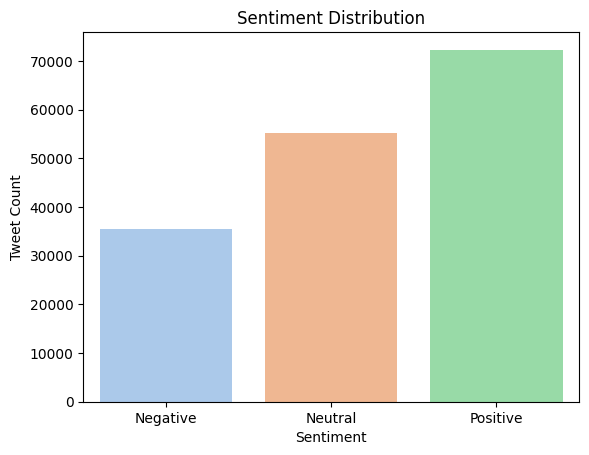

/tmp/ipython-input-4-1181505291.py:60: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df[col].dropna().head()) # Check a few non-null values


No suitable date column found for time trend analysis.


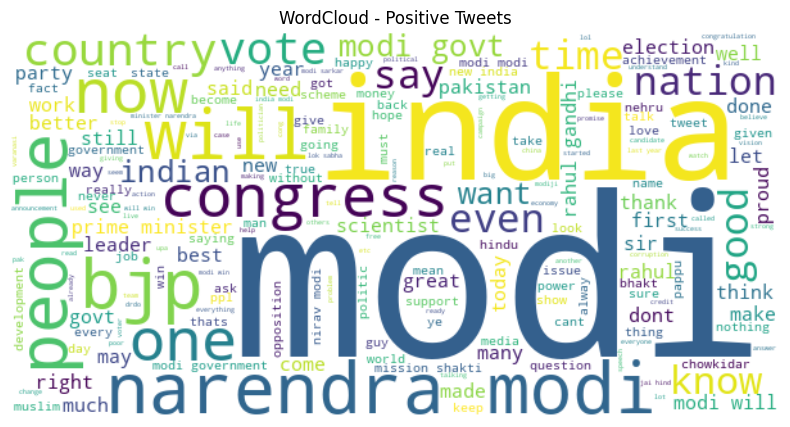

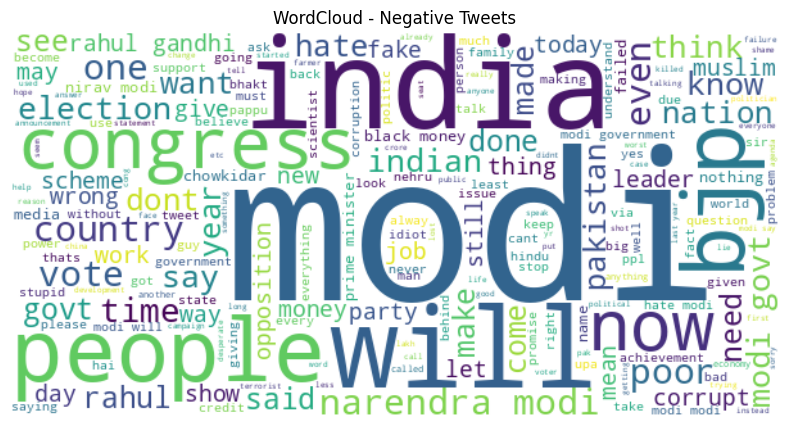

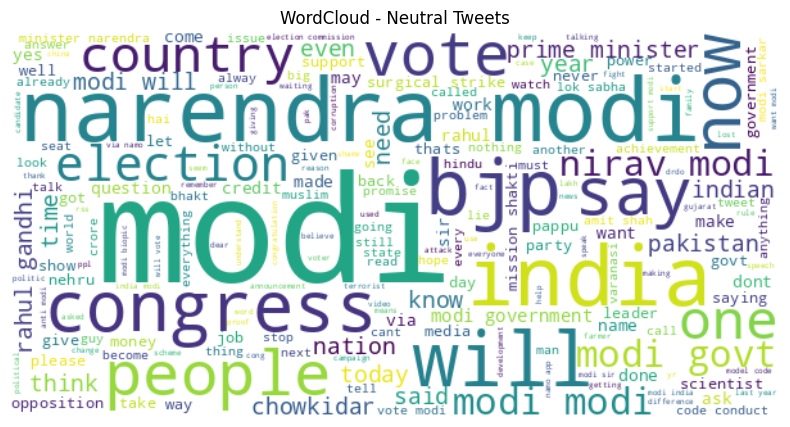


Sentiment Counts:
Sentiment
Positive    72304
Neutral     55153
Negative    35519
Name: count, dtype: int64

Sentiment Percentage:
Sentiment
Positive    44.364814
Neutral     33.841179
Negative    21.794006
Name: proportion, dtype: float64


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
import re
import nltk

# Step 1: Download required NLTK data
nltk.download('punkt')

# Step 2: Load your dataset
# Replace with the actual file path or name
df = pd.read_csv(r"/content/X data (1).csv")

# Step 3: Clean & preprocess the data
# Check available columns
print("Available columns:", df.columns.tolist())

# Use correct column for tweet text
tweet_col = "clean_text"  # change if your column name is different

df = df.dropna(subset=[tweet_col])
df[tweet_col] = df[tweet_col].astype(str)

# Clean text: remove URLs, mentions, special characters
def clean_text(text):
    text = re.sub(r'http\S+', '', text)        # remove URLs
    text = re.sub(r'@\w+', '', text)           # remove mentions
    text = re.sub(r'[^A-Za-z\s]', '', text)    # remove special characters
    return text.lower()

df[tweet_col] = df[tweet_col].apply(clean_text)

# Step 4: Apply sentiment analysis
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df['Sentiment'] = df[tweet_col].apply(get_sentiment)

# Step 5: Sentiment distribution plot
sns.countplot(data=df, x='Sentiment', palette='pastel')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()

# Step 6: Time-based sentiment trend (if date column exists)
date_col = None
for col in df.columns:
    if 'date' in col.lower() or 'time' in col.lower():
        # Check if the column contains datetime-like values
        try:
            pd.to_datetime(df[col].dropna().head()) # Check a few non-null values
            date_col = col
            break
        except:
            continue


if date_col:
    print(f"Using '{date_col}' for time trend analysis.")
    df[date_col] = pd.to_datetime(df[date_col])
    df['Day'] = df[date_col].dt.date

    daily_sentiment = df.groupby(['Day', 'Sentiment']).size().unstack().fillna(0)
    daily_sentiment.plot(kind='line', figsize=(12, 6), title="Daily Sentiment Trend")
    plt.xlabel("Date")
    plt.ylabel("Tweet Count")
    plt.show()
else:
    print("No suitable date column found for time trend analysis.")


# Step 7: WordCloud per sentiment
for sentiment in ['Positive', 'Negative', 'Neutral']:
    text = ' '.join(df[df['Sentiment'] == sentiment][tweet_col])
    if text.strip():  # avoid empty wordclouds
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(f"WordCloud - {sentiment} Tweets")
        plt.show()

# Step 8: Summary statistics
print("\nSentiment Counts:")
print(df['Sentiment'].value_counts())

print("\nSentiment Percentage:")
print(df['Sentiment'].value_counts(normalize=True) * 100)